In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm,skew
from scipy import stats

from sklearn.model_selection import KFold, cross_val_score,train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.met

import warnings
warnings.filterwarnings('ignore')

In [106]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.shape

(1460, 81)

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
df_train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [107]:
# missing values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [108]:
# Fill the NA with none

for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'):
    df_train[col] = df_train[col].fillna('None')

In [109]:
# Will the LotFrontage with the neibhorhood vmedian value

df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [110]:
for col in ('GarageCond', 'GarageType', 'GarageFinish', 'GarageQual'):
    df_train[col]= df_train[col].fillna('None')

df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1','BsmtCond'):
    df_train[col] = df_train[col].fillna('None')


In [111]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [112]:
df_train.isnull().sum().max()

0

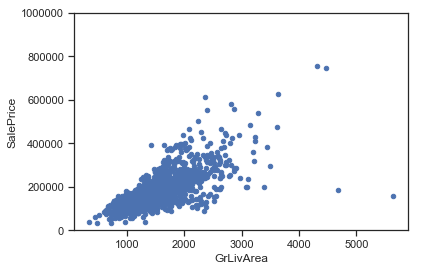

In [113]:
# Outlier Analysis
# Scatterplot for living area and Sale Price

df_train.plot.scatter(x='GrLivArea', y="SalePrice", ylim=(0,1000000))

In [114]:
# there are two unsual price of the house for grater living area 

df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,480,Gd,None,None,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,...,0,None,None,None,0,10,2007,New,Partial,184750


In [115]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

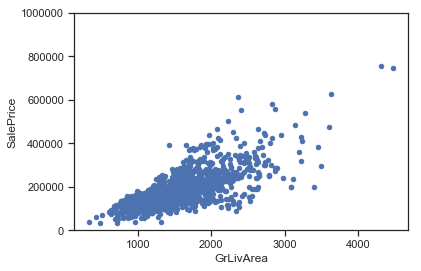

In [116]:
# checking the Scatterplot after removing outliers

df_train.plot.scatter(x='GrLivArea', y="SalePrice", ylim=(0,1000000))

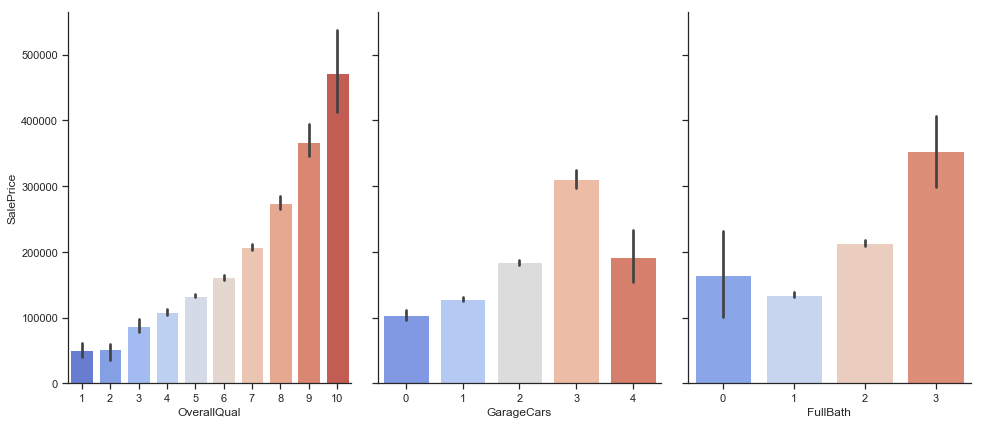

In [118]:
# Pairgrid to analyse the OverallQual, 
# GarageCars, FullBath,SalePrice 

g = sns.PairGrid(df_train,
                x_vars=['OverallQual', 'GarageCars','FullBath'],
                y_vars=['SalePrice'],
                aspect=.75,
                size=6)
g.map(sns.barplot, palette="coolwarm")
plt.show()

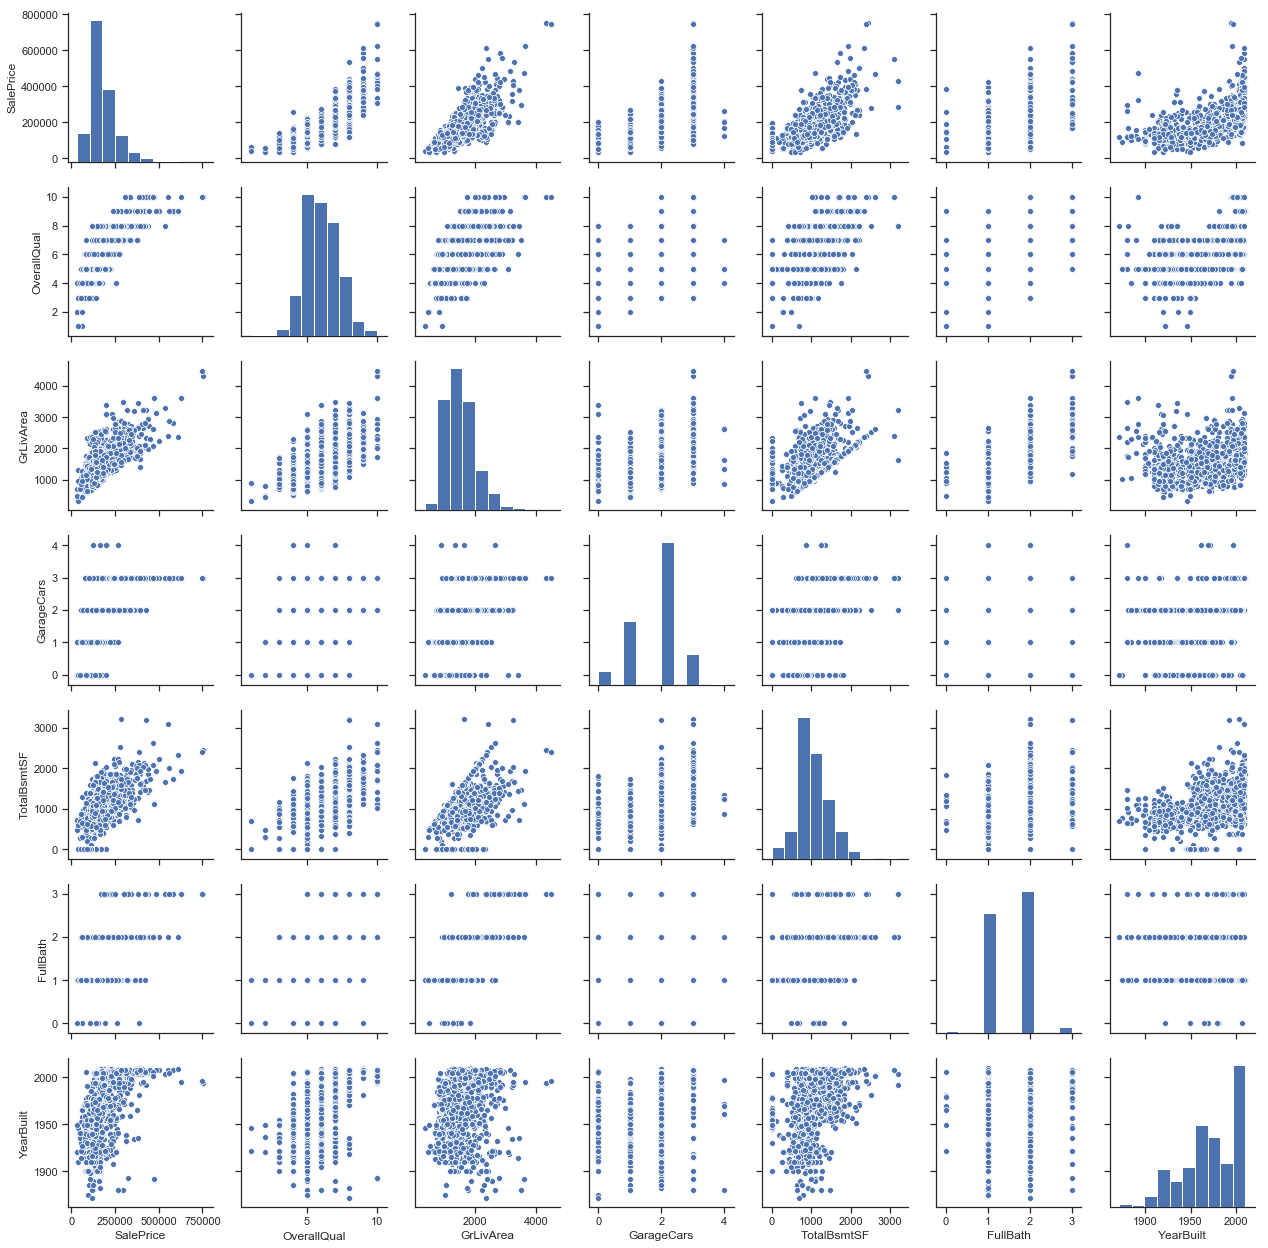

In [89]:
# Pair plot

sns.set(style ='ticks')
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

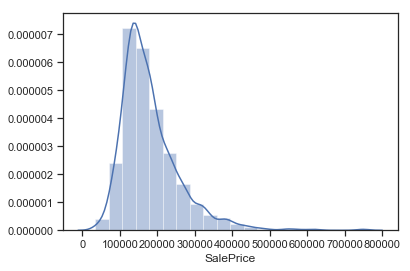

In [119]:
# Distribution of sale price

sns.distplot(df_train['SalePrice'], bins=20)
plt.show()

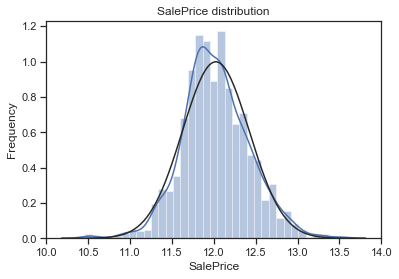

mu : 12.0240 and sigma : 0.3996


In [120]:
# log tranformation can be used to normalize the 
# positively/right skewed ditribution 

df_train["SalePrice"]= np.log1p(df_train["SalePrice"])

# new distribution
sns.distplot(df_train['SalePrice'], fit = norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

# Fitted paramter used by the function
mu,sigma = norm.fit(df_train['SalePrice'])
print(f"mu : {mu:.4f} and sigma : {sigma:.4f}")


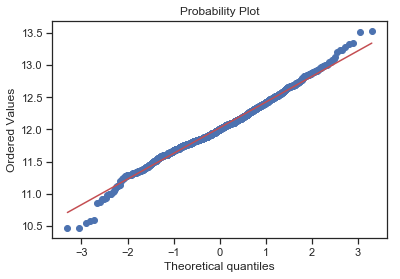

In [121]:
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

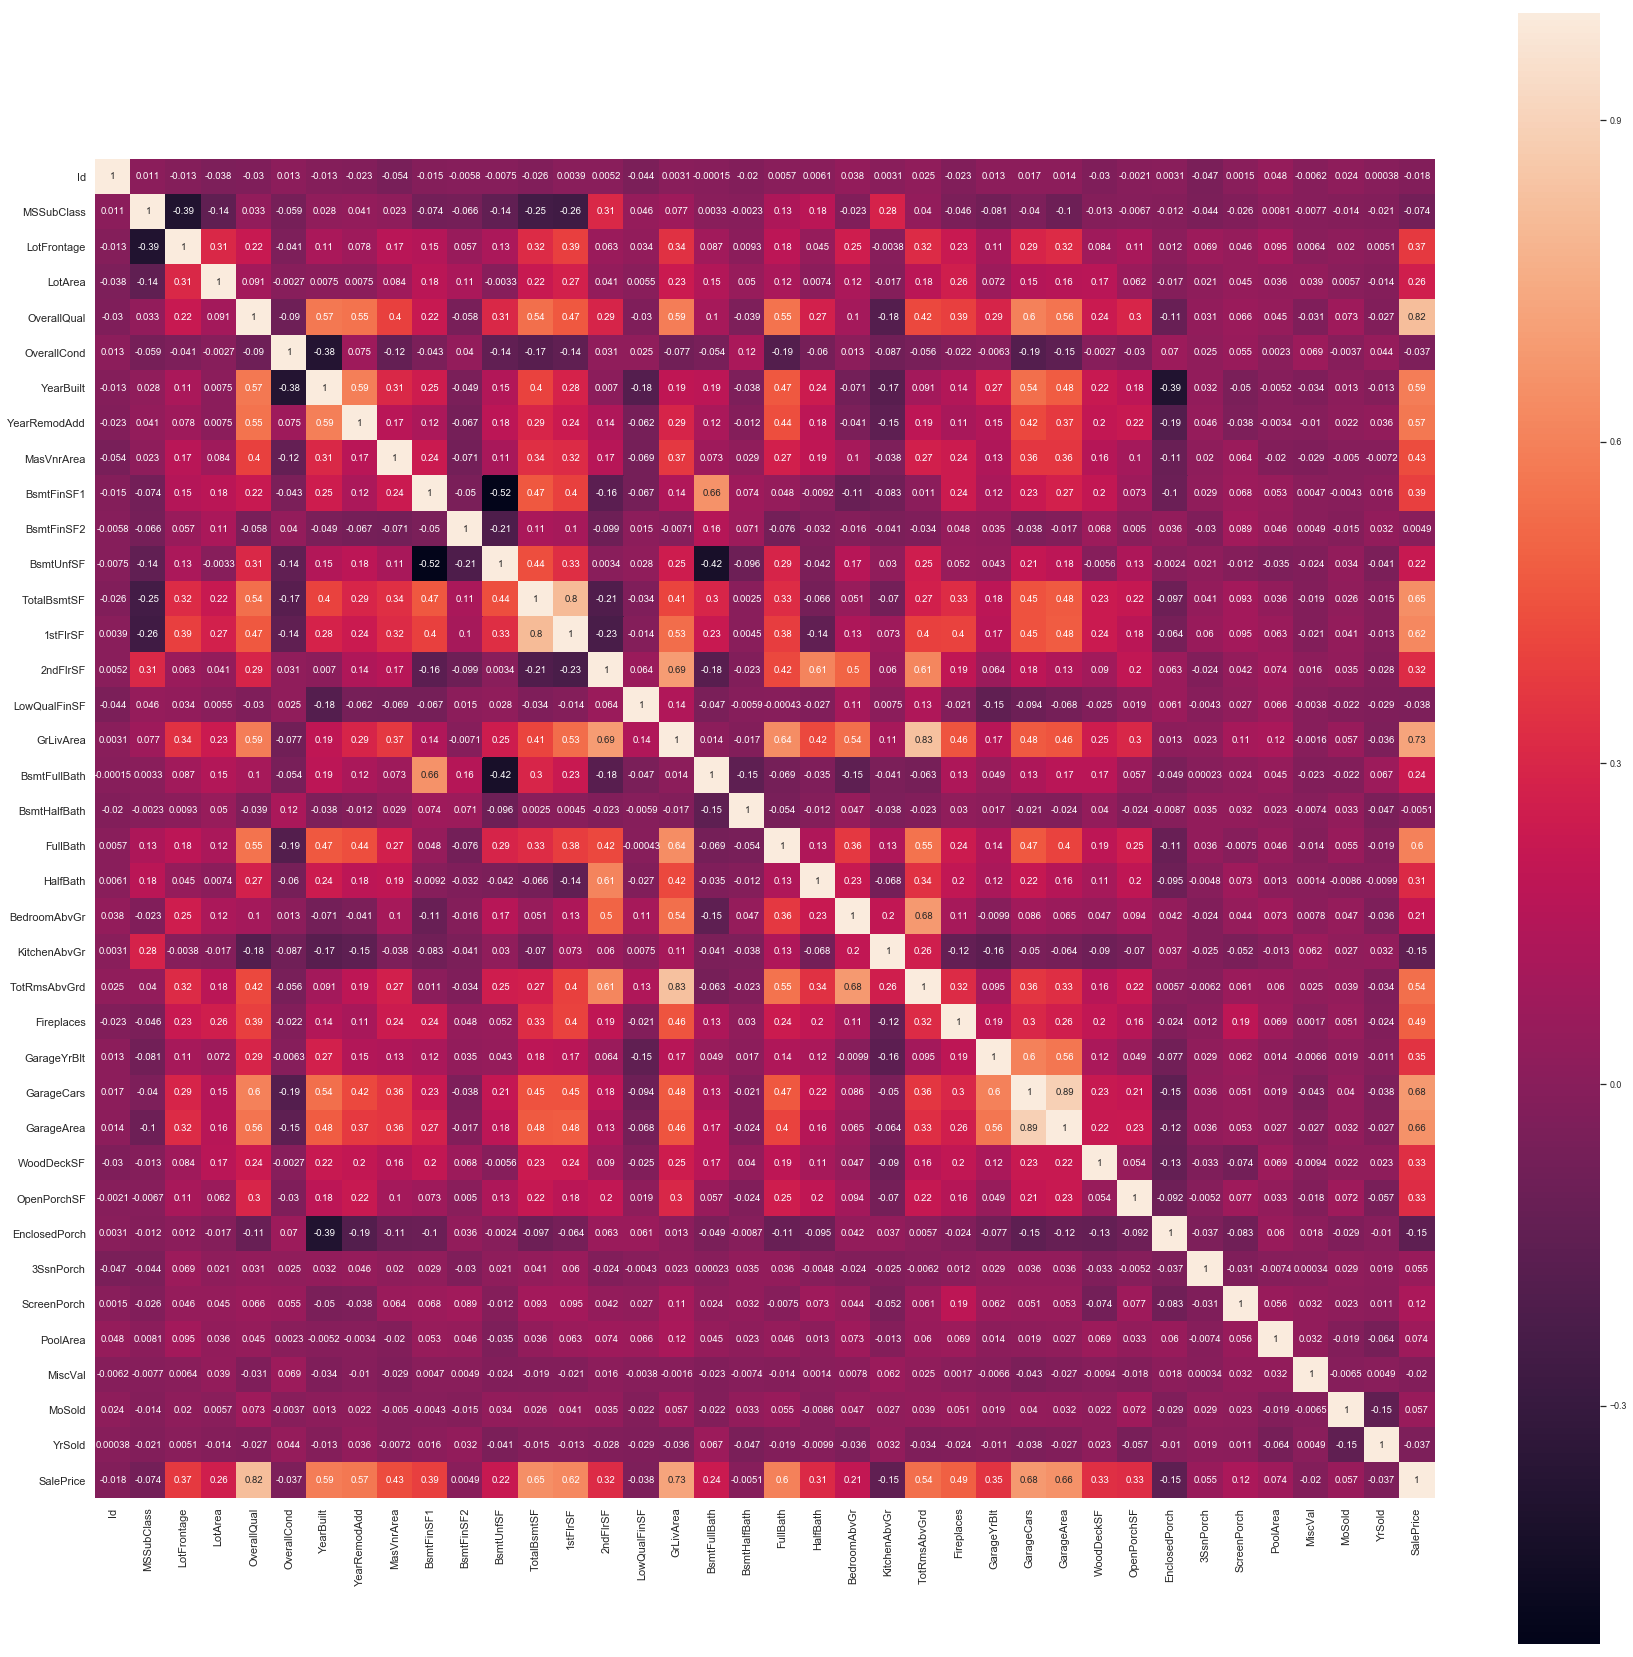

In [124]:
# Correlation between the features
plt.subplots(figsize=(30, 30))
sns.set(font_scale=0.8)
sns.heatmap(df_train.corr(), square= True, cbar= True, annot= True)
plt.show()

In [128]:
# Feature Engineering
# Determine the skewness in numerical parameters

numeric_features=df_train.dtypes[df_train.dtypes !="object"].index

#calculate skewness using lambda functions

skewed_features = df_train[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[skewed_features > 0.75]
skewed_features = skewed_features.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [131]:
df_train[skewed_features] = np.log1p(df_train[skewed_features])
# adding dummy values for categorical variables
df_train = pd.get_dummies(df_train)

In [134]:
# Preparing array for predictors and target

X= df_train.drop(['SalePrice'], axis=1).values
y=df_train['SalePrice'].values

In [135]:
# Split the data into train and val sets

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.20,random_state=42)

In [137]:
# KFold cross validation 

n_folds = 5
def rmse_cv(model):
    kf = KFold(n_folds, shuffle = True, random_state=42)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, 
                                    scoring="neg_mean_squared_error", 
                                    cv=kf))
    return rmse

n_folds = 5
custom_cv = KFold(n_folds, shuffle=True, random_state=42)

In [143]:
# Predictive Models
# GradientBoostingRegressor

GBR_model = GradientBoostingRegressor(n_estimators=3000,
                               learning_rate = 0.05,
                               max_depth = 4,
                               max_features = 'sqrt',
                               min_samples_leaf = 15,
                               min_samples_split=10,
                               loss='huber', 
                               random_state=5)



GBR_model.fit(X_train, y_train)
print(f"{rmse_cv(GBR_model).mean():.4f}")
print("Validation R^2: %.4f" % r2_score)

0.1178
